In [2]:
import math
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib
import urllib.request as urlreq
import json
from math import *
from functools import reduce
import scipy.stats

In [5]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:76.0) Gecko/20100101 Firefox/76.0'}
load_size = 10000
days = 30
daysPerLoad = load_size*13/(24*3600)
latest = ""
blocks = []
for _ in range(int(days/daysPerLoad)):
    url = 'https://blocks.flashbots.net/v1/blocks?limit={}&before={}'.format(load_size, latest)
    req = urlreq.Request(url=url, headers=headers)
    data = urlreq.urlopen(req).read()
    dic = json.loads(data)
    blocks += dic["blocks"]
    latest = blocks[-1]["block_number"]

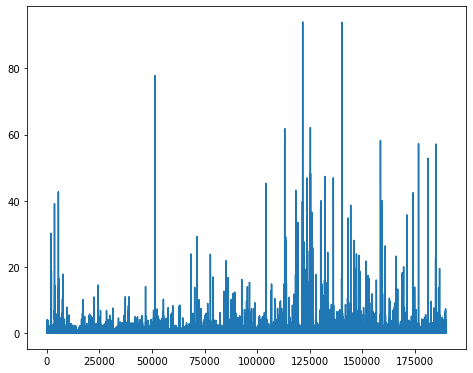

In [99]:
resize = 0.8
plt.rcParams['figure.figsize'] = [resize*25/2.54, resize*20/2.54]
weiToEth = 10**-18
EthToGwei = 10**9
gweiToEth = 10**(-9)
weiToGwei = 10**(-9)
GweiToWei = 10**9
blocks = [block for block in blocks if int(block["miner_reward"]) > 0]
rewards = [int(block["miner_reward"])*weiToEth for block in blocks]
n_blocks = len(rewards)
plt.plot(rewards[0:n_blocks])
plt.show()

In [100]:
def get_local_maxs(l, within=100):
    def red_fun(a,b):
        if a == []:
            return [b]
        i = a[-1][0]
        r1 = a[-1][1]
        j = b[0]
        r2 = b[1]
        if j - i > within:
            a += [(j, r2)]
        elif r2 > r1:
            a[-1] = (j,r2)
        return a

    return reduce(red_fun, enumerate(l), [])

def get_spikes(l, n=10, factor=2, within=100):
    return [(i,v) for i,v in get_local_maxs(l, within=100) if [0 for val in l[i-n:i] + l[i+1:i+n] if factor*val > v] == []]

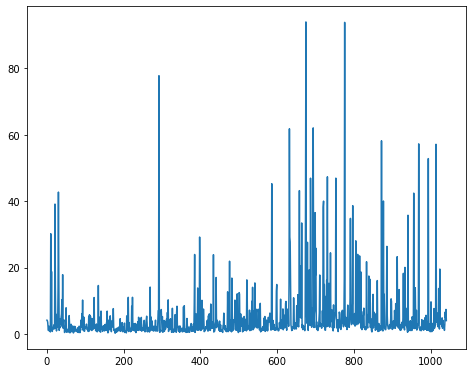

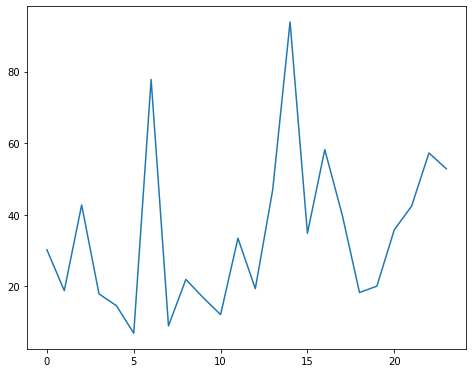

Percentage of blocks with spike MEV: 0.013%
Percentage of total rewards coming from spike MEV: 2.328%


In [115]:
local_maxs = get_local_maxs(rewards)
indices = [i for i,_ in local_maxs]
maxs = [r for _,r in local_maxs]
spikes = get_spikes(rewards, n=100, factor=10)
plt.plot(maxs)
plt.show()
ind = [i for i, _ in spikes]
vals = [s for _, s in spikes]
plt.plot(vals)
plt.show()
print("Percentage of blocks with spike MEV: {}%".format(round(100*len(ind)/n_blocks, 3)))
print("Percentage of total rewards coming from spike MEV: {}%".format(round(100*np.sum(vals)/np.sum(rewards), 3)))

# maybe do a 3d plot of this for varying n, factor

In [56]:
s = 0
n = 2
for i, _ in spikes:
    s += np.sum(rewards[i-n:i] + rewards[i+1:i+n])
print("Mean rewards within {} blocks of spike MEV blocks, in both directions: {}".format(n, s/(2*n*len(spikes))))
non_spike = [rewards[i] for i in range(n_blocks) if i not in ind]
print("Mean rewards for all non spike MEV blocks: {}".format(np.mean(non_spike)))
print("Mean rewards: {}".format(np.mean(rewards)))

Mean rewards within 2 blocks of spike MEV blocks, in both directions: 0.18444656649860003
Mean rewards for all non spike MEV blocks: 0.16889946408399853
Mean rewards: 0.18583164912592562


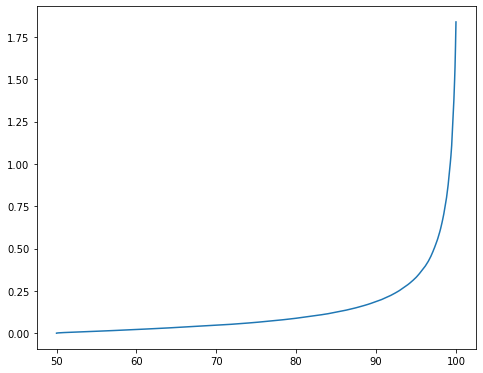

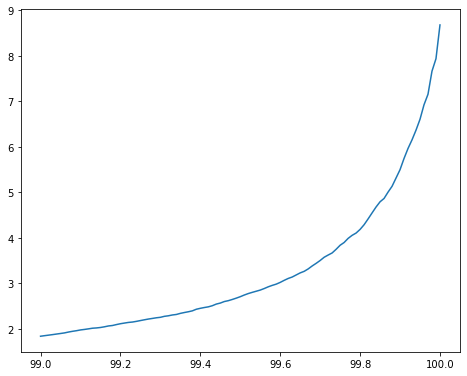

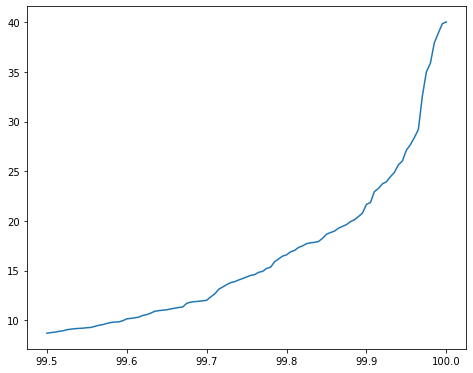

In [78]:
plt.plot(np.linspace(50, 100, 5001), np.percentile(rewards, np.linspace(0, 99, 5001)))
plt.figure()
plt.plot(np.linspace(99, 100, 101), np.percentile(rewards, np.linspace(99, 99.9, 101)))
plt.figure()
plt.plot(np.linspace(99.5, 100, 101), np.percentile(rewards, np.linspace(99.9, 99.99, 101)))

In [76]:
np.percentile(rewards, np.linspace(99, 100, 101))

array([ 1.8381356 ,  1.85138956,  1.86412994,  1.87543348,  1.89006277,
        1.90302408,  1.92756928,  1.94364066,  1.95845577,  1.97651716,
        1.98913922,  2.00501622,  2.01625727,  2.02423553,  2.03965905,
        2.05781313,  2.07227398,  2.09189048,  2.11322322,  2.13033202,
        2.14283472,  2.15546241,  2.17327453,  2.19342152,  2.21209298,
        2.22742505,  2.2433368 ,  2.25409582,  2.27801676,  2.29008915,
        2.30859317,  2.32691186,  2.34791623,  2.37164048,  2.39362165,
        2.42730636,  2.45184633,  2.47174636,  2.48953743,  2.52589463,
        2.55918173,  2.58812898,  2.6109985 ,  2.63620117,  2.67138692,
        2.70742117,  2.75009913,  2.78262957,  2.80974057,  2.84210528,
        2.87562769,  2.91183127,  2.94670505,  2.98176972,  3.0217701 ,
        3.07253545,  3.11434993,  3.14888731,  3.20435023,  3.25130898,
        3.29032354,  3.36159238,  3.42459448,  3.50313466,  3.58968532,
        3.63111642,  3.68934046,  3.77831414,  3.8811594 ,  3.95

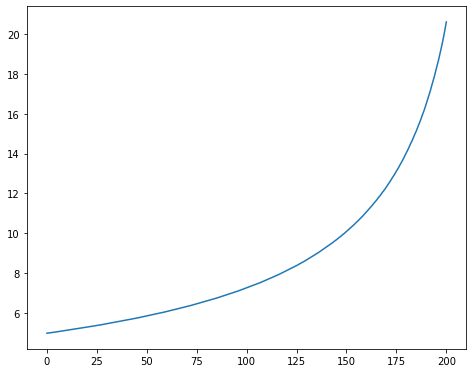

In [80]:
rewards = np.array(rewards)
plt.plot([np.mean(rewards[rewards >= percentile]) for percentile in np.percentile(rewards, np.linspace(99,99.9,201))])

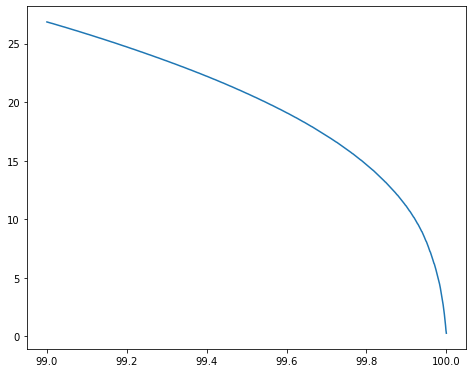

In [86]:
plt.plot(np.linspace(99, 100, 1000), [100*np.sum(rewards[rewards >= percentile])/np.sum(rewards) for percentile in np.percentile(rewards, np.linspace(99, 100, 1000))])

0.26629514809062643